Функции в Pandas hw

Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('D:/PYDA/lesson 11/ml-latest-small/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
movies = pd.read_csv('D:/PYDA/lesson 11/ml-latest-small/ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df = pd.merge(movies, ratings, on = 'movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [8]:
def classify_movies(row):
    if row.rating <= 2:
        return 'low rating'
    elif row.rating >= 4.5:
        return 'high rating'
    return 'middle rating'

In [9]:
df['class'] = df.apply(classify_movies, axis=1)
df.head(5)

,movieId,title,genres,userId,rating,timestamp,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,middle rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,middle rating
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,high rating
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,low rating
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,middle rating


Задание 2

Используем файл keywords.csv.
Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.
Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [11]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [17]:
df = pd.read_csv('D:/PYDA/lesson 11/Python_11_functions_groupby/keywords.csv')
df.tail(5)

,keyword,shows
99995,эльдорадо старый оскол,3705
99996,frigate для firefox,3630
99997,укрсиб,3630
99998,погода в ялте на неделю,3688
99999,ггму,3630


In [23]:
def get_region(row):
    for region in geo_data:
        for city in geo_data[region]:
            if city in row['keyword']:
                return region
    return 'undefined'

In [24]:
df['region'] = df.apply(get_region, axis=1)

In [25]:
df.loc[3686:3692]

,keyword,shows,region
3686,вебмастер,63267,undefined
3687,авито хабаровск,63736,Дальний Восток
3688,сибирское здоровье официальный сайт,63854,undefined
3689,погода тольятти,66884,undefined
3690,авито нижнекамск,63731,undefined
3691,антиплагиат онлайн,63563,undefined
3692,такси яндекс,344028,undefined


Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [6]:
import numpy as np

In [7]:
years = np.arange(1950,2010)

In [8]:
def production_year(row):
    for y in years:
        if str(y) in row['title']:
            return y
    return 1900

In [9]:
df['year'] = df.apply(production_year, axis=1)
df.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,1995


In [23]:
df.groupby('year').mean()[['rating']].reset_index()[['year','rating']].sort_values('rating', ascending=False)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
...,...,...
56,2005,3.448434
54,2003,3.444777
47,1996,3.426600
48,1997,3.415764


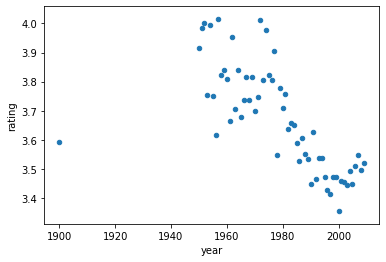

In [22]:
df.groupby('year').mean()[['rating']].reset_index()[['year','rating']].plot(kind ='scatter', x = 'year', y = 'rating')